<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_S24/blob/master/04_05_over_determined_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Underdetermined System**

The code from the textbook [1] was modified to run on Google Colab.

[1] https://github.com/kursatkara/databook_python/blob/master/CH04/CH04_SEC03_1_OverUnderDetermined.ipynb

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin
from matplotlib import rcParams
rcParams.update({'font.size': 12})


L2 optimization: True   Optimization terminated successfully
L1 optimization: True   Optimization terminated successfully


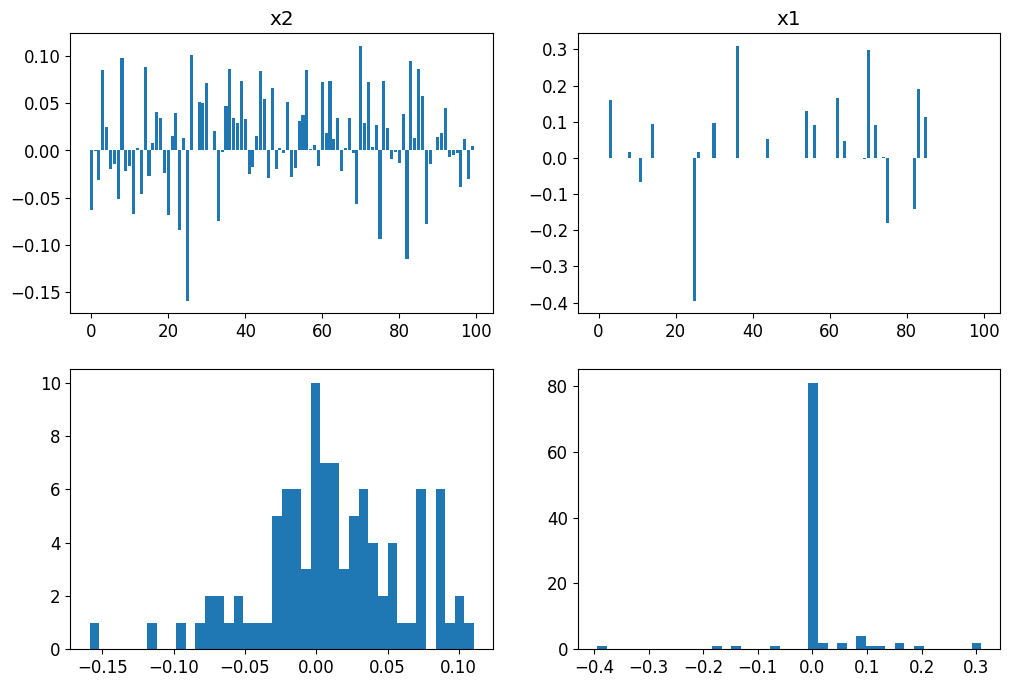

In [23]:
# Underdetermined System
# The problem is minimization of ||x||2 subject to A x - b = 0

n = 20
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

################################################################################
# L2-norm (largest sing. value)
def two_norm(x):
    return np.linalg.norm(x,ord=2)

# Constraint
# type  : ‘eq’ for equality, ‘ineq’ for inequality.
# fun   : The function defining the constraint.
constr = ({'type': 'eq', 'fun': lambda x:  A @ x - b})

# Initial guess
x0 = np.random.rand(m)

# Minimization of scalar function of one or more variables.
# scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)[source]
#   fun         : The objective function to be minimized
#   x0          : Initial guess.
#   method      : Minimize using Sequential Least Squares Programming (SLSQP).
#                 for other algorithims, check https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
#   constraints : Constraints definition. Only for COBYLA, SLSQP and trust-constr.
#
#   The optimization result represented as a OptimizeResult object.
#   Important attributes are: x the solution array, success a Boolean flag indicating if the optimizer exited successfully and message which describes the cause of the termination.
res = minimize(two_norm, x0, method='SLSQP',constraints=constr)

x2 = res.x
print("L2 optimization:", res.success, " ", res.message)
################################################################################
# L1-norm: max(sum(abs(x), axis=0))
def one_norm(x):
    return np.linalg.norm(x,ord=1)

res = minimize(one_norm, x0, method='SLSQP',constraints=constr, options={'maxiter': 500})

x1 = res.x
print("L1 optimization:", res.success, " ", res.message)
################################################################################
# Plots
plt.rcParams['figure.figsize'] = [12, 8]
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].bar(range(m),x2)
axs[0].set_title('x2')
axs[1].bar(range(m),x1)
axs[1].set_title('x1')

axs[2].hist(x2,40)
axs[3].hist(x1,40)


plt.show()